In [21]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
%matplotlib inline

In [22]:
data = pd.read_csv(r"C:\Users\krish\OneDrive\KrishDocs\A a-level preparation\datasets\insurance.csv")

In [23]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
x=data.iloc[:,:-1].values
y=data.iloc[:,6].values

In [7]:
x

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [8]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

<AxesSubplot:>

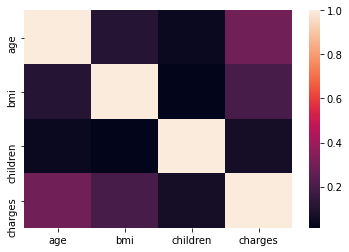

In [9]:
sns.heatmap(data.corr())

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder= LabelEncoder()



In [11]:
categorical_columns = ["sex","children","smoker","region"]
data_encode=pd.get_dummies(data = data, prefix = 'OHE', prefix_sep='_')

In [12]:
data_encode

,age,bmi,children,charges,OHE_female,OHE_male,OHE_no,OHE_yes,OHE_northeast,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [13]:
from sklearn.model_selection import train_test_split
X = data_encode.drop('charges', axis =1)
y = data_encode['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =0)

In [14]:
from sklearn.linear_model import LinearRegression 
regressor= LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(X_test)
y_pred

array([1.11699271e+04, 9.48670909e+03, 3.81811231e+04, 1.62663133e+04,
       6.91464801e+03, 3.96348488e+03, 1.57939691e+03, 1.43852566e+04,
       9.01257970e+03, 7.50846068e+03, 4.49176728e+03, 1.02795839e+04,
       8.80129751e+03, 3.79802013e+03, 2.79262010e+04, 1.07151158e+04,
       1.12889756e+04, 6.10501768e+03, 8.24104117e+03, 2.71445089e+04,
       3.36440910e+04, 1.43551043e+04, 1.17372043e+04, 3.21374335e+04,
       4.17005913e+03, 9.25496051e+03, 1.08433751e+03, 9.80417085e+03,
       3.77104596e+03, 1.04318587e+04, 9.00931722e+03, 4.00749509e+04,
       1.56889543e+04, 1.38794545e+04, 2.47597127e+04, 5.16638285e+03,
       1.26109277e+04, 3.07691018e+04, 3.35498325e+04, 3.67154946e+03,
       3.97568613e+03, 3.98729942e+03, 3.05285774e+04, 3.95053023e+04,
       2.78105036e+04, 5.09258923e+03, 1.06042481e+04, 7.82952256e+03,
       3.59255553e+03, 1.02128745e+04, 5.72038147e+03, 3.42627499e+03,
       3.30210242e+04, 3.84738218e+04, 1.60534782e+04, 7.16491905e+03,
      

In [16]:
print(regressor.coef_)

[ 2.53700500e+02  3.35962814e+02  4.36910121e+02  7.73186394e+00
 -7.73186394e+00 -1.18025086e+04  1.18025086e+04  4.83840068e+02
  2.23707336e+02 -4.29438766e+02 -2.78108638e+02]


In [17]:
print(regressor.intercept_)

-517.1368358425716


In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7999876970680434

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value')

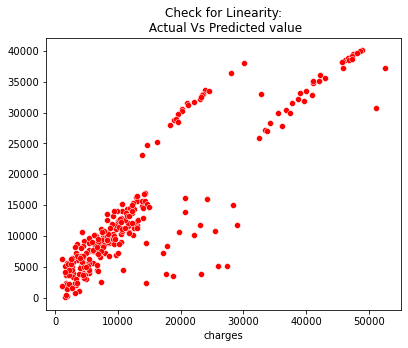

In [19]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

In [20]:
data_encode.head()

,age,bmi,children,charges,OHE_female,OHE_male,OHE_no,OHE_yes,OHE_northeast,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
